# Customer Churn Analysis

* Problem Statement:                         
    To explore and anlyze the customer data of specific ott platform to discover the key factors responsible for customer churn and to provide              appropriate recommendations to ensure customer retention.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/Prabhune/Documents/customer_churn_dataset-training-master.csv")
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


                                    
 The given dataset reveals information on various factors relating to the customer churn of a specific ott platform. This dataset consists of 440832     rows and 11 columns with relevant customer information like age, gender, support calls, tenure, contract length,subscription type,etc.

* Variable Description                          
   1. Age:              Can be used to understand age-related trends in customer retention.                       
   2. Gender:           The gender of the customer (e.g., Male, Female).                                    
   3. Tenure:           The number of months the customer has been with the company.                      
   4. Usage Frequency:  How often the customer uses the service (e.g., daily, weekly, monthly).                            
   5. Support Calls:    The number of times the customer has called support                                     
   6. Payment Delay:    Number of days the customer is late in making payments.                               
   7. SubscriptionType: Type of subscription the customer has (e.g., Basic, Premium).                                 
   8. Contract Length:  Duration of the contract (e.g., Month-to-Month, One year, Two years).                                  
   9. Total Spend:      The total amount of money the customer has spent.
   10. Last Interaction:The date or time since the customer's last interaction with the service.
   11. Churn:            The target variable that indicates whether a customer has left the service, crucial for building predictive models.                                

In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


 head() shows the first 5(by default) rows of the dataset

## Data Preprocessing

In [5]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

 There is one null value in each row. Therefore we may drop that row from the dataset

In [6]:
data.dropna(inplace=True)

Also we drop the column of Customer ID. Since, it is of no use in the analysis.

In [7]:
data.drop("CustomerID",axis=1,inplace=True)

In [8]:
data.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Now there are zero null values in the dataset

In [9]:
convert_dict = {'Age': int,
                'Tenure': int,
                'Usage Frequency': int,   
                'Support Calls' : int,
                'Payment Delay' : int,
                'Last Interaction': int,
                'Churn': int
                }
 
data = data.astype(convert_dict)

In [10]:
data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30,Female,39,14,5,18,Standard,Annual,932.00,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1
...,...,...,...,...,...,...,...,...,...,...,...
440828,42,Male,54,15,1,3,Premium,Annual,716.38,8,0
440829,25,Female,8,13,1,20,Premium,Annual,745.38,2,0
440830,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0
440831,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0


In [11]:
data["Churn"]=data["Churn"].astype(str)

## Visualisation

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
churn_counts = data['Churn'].value_counts()
churn_counts

Churn
1    249999
0    190833
Name: count, dtype: int64

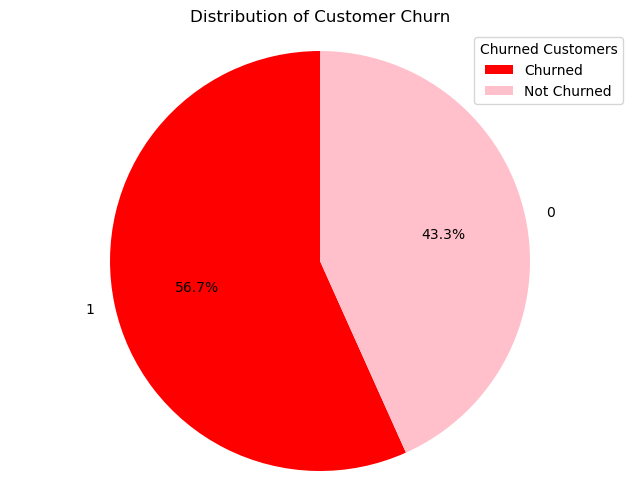

In [14]:
# pie chart
plt.figure(figsize=(8, 6))
x=["Churned","Not Churned"]
y=data["Churn"].unique()
plt.pie(churn_counts, labels=y,autopct='%1.1f%%',startangle=90, colors=['Red','Pink'])
plt.title('Distribution of Customer Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(x,title = "Churned Customers")
plt.show()

* Interpretation:              
  From above Pie chart it is seen that among complete dataset there are 249999 (56.7%) churned customers and remaining are continued with the service

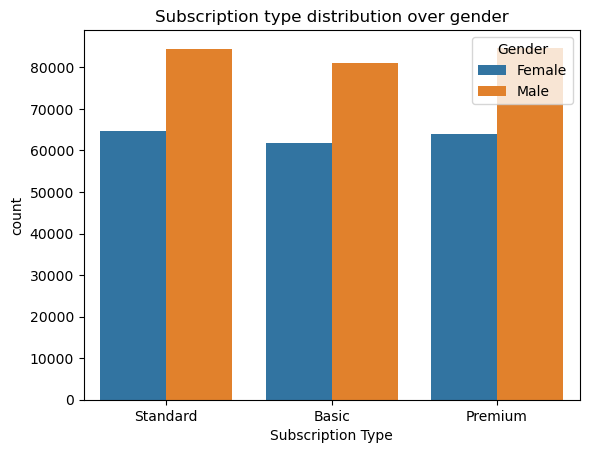

In [15]:
# count plot
ax = sns.countplot(x="Subscription Type",hue="Gender", data=data)
unique_genders = data["Gender"].unique()
plt.title("Subscription type distribution over gender")
plt.legend(title = "Gender",labels=unique_genders)

* Interpretation :                                  
  The chart displays three subscription types: Standard, Basic, and Premium. For each subscription type, there are two bars representing the count of     subscribers based on gender: one for female and one for male.
  It is observed that Female subscribers are Slightly lower than male subscribers in each type.                  


In [16]:
data["Churn"]=data["Churn"].astype(int)

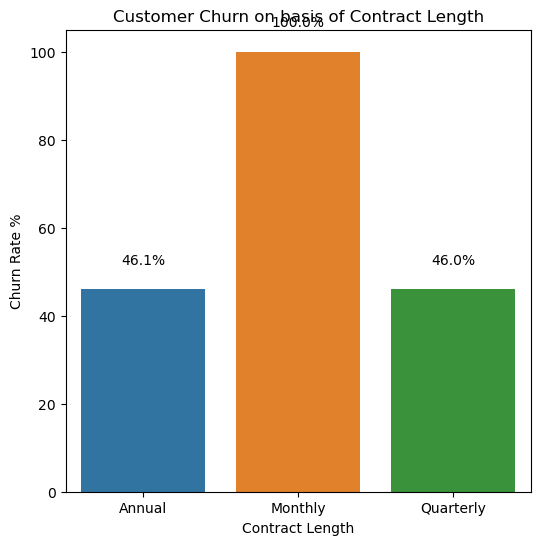

In [17]:
x1=data['Contract Length'].unique()
y1=data.groupby('Contract Length')['Churn'].mean()*100
plt.figure(figsize=(6,6))
plots=sns.barplot(x=x1,y=y1)
for rect in plots.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, f"{height:.1f}%", ha="center", va="bottom")
plt.title("Customer Churn on basis of Contract Length")
plt.xlabel("Contract Length")
plt.ylabel("Churn Rate %")
plt.show()

* Interpretation:                                              
  1. The chart compares the churn rate (percentage of customers who leave) based on different contract lengths.                            
  2. The churn rate is significantly higher for customers with monthly contracts. 
This suggests that customers on monthly contracts are more likely to       leave the service                  
  3. The churn rates for annual and quarterly contracts are lower compared to monthly contracts. 
Customers on longer-term contracts tend to stay with         the service                           ..

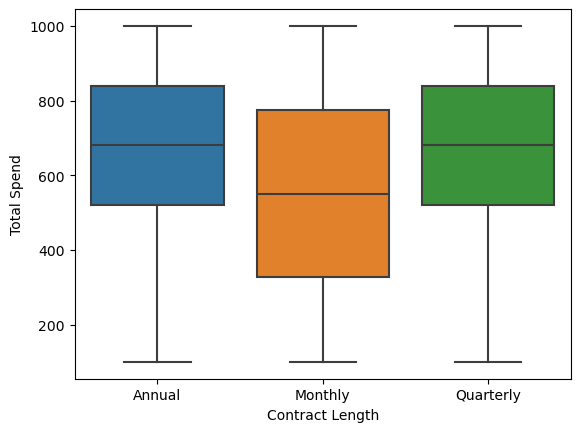

In [18]:
sns.boxplot(x=data['Contract Length'],y=data['Total Spend'])
plt.show()

## Model Building

In [19]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data["Gender"] = l.fit_transform(data["Gender"])
data["Subscription Type"] = l.fit_transform(data["Subscription Type"])
data["Contract Length"] = l.fit_transform(data["Contract Length"])
print(data)

        Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0        30       0      39               14              5             18   
1        65       0      49                1             10              8   
2        55       0      14                4              6             18   
3        58       1      38               21              7              7   
4        23       1      32               20              5              8   
...     ...     ...     ...              ...            ...            ...   
440828   42       1      54               15              1              3   
440829   25       0       8               13              1             20   
440830   26       1      35               27              1              5   
440831   28       1      55               14              2              0   
440832   31       1      48               20              1             14   

        Subscription Type  Contract Length  Total Spend  Last I

 Label encoder is used to code the categorical data into numeric values.                        
 In this Dataset Gender, Subscription Type and Contract length are coded as follows:                    
 1. Gender : Female(0) and Male(1)
 2. Subscription Type: Basic(0), Premium(1), Standard(2)
 3. Contract Length: Annual(0), Monthly(1), Quaterly(2)

In [20]:
# Train and test split
from sklearn.model_selection import train_test_split
X=data.drop(["Churn"],axis=1)
Y=data["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)

## Model Evaluation

### 1. Logistic Model

In [21]:
# Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score, recall_score
LR=LogisticRegression(max_iter=5000)
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=5000)

In [22]:
pred_LR=LR.predict(X_test)

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(Y_test,pred_LR)
print("Accuracy:",a)

Accuracy: 0.851372962673109


In [24]:
# Classification Report
from sklearn.metrics import classification_report
CR=classification_report(Y_test,pred_LR)
print(CR)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     38196
           1       0.88      0.85      0.87     49971

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



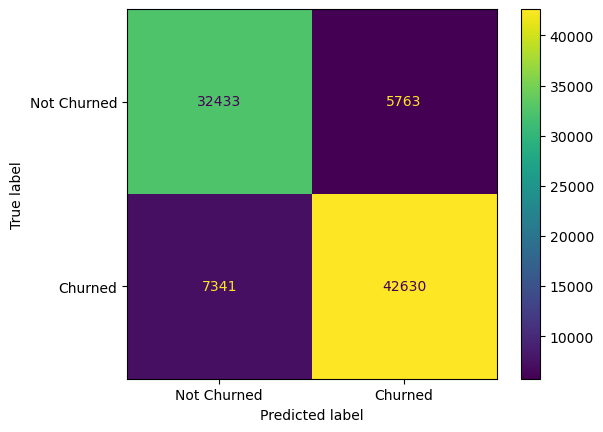

In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_LR)
cm
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [26]:
# Model fitting with GridSearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
Model1= GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [27]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_LR =Model1.predict(X_test)
# Print values
print("Best parameters found: ", Model1.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_LR))
print("Classification Report:\n", classification_report(Y_test, g_pred_LR))

Best parameters found:  {'C': 100, 'solver': 'lbfgs'}
Accuracy:  0.8514977259065183
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83     38196
           1       0.88      0.85      0.87     49971

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



### 2. Naive Bayes 

In [28]:
# Model fitting
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,Y_train)
y_pred=nb.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [29]:
# Accuracy
from sklearn.metrics import accuracy_score
accur_score=accuracy_score(Y_test,y_pred)
print("Accuracy:",accur_score)

Accuracy: 0.9104653668606167


In [30]:
# Classification report
from sklearn.metrics import classification_report
report=classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     38196
           1       0.95      0.89      0.92     49971

    accuracy                           0.91     88167
   macro avg       0.91      0.91      0.91     88167
weighted avg       0.91      0.91      0.91     88167



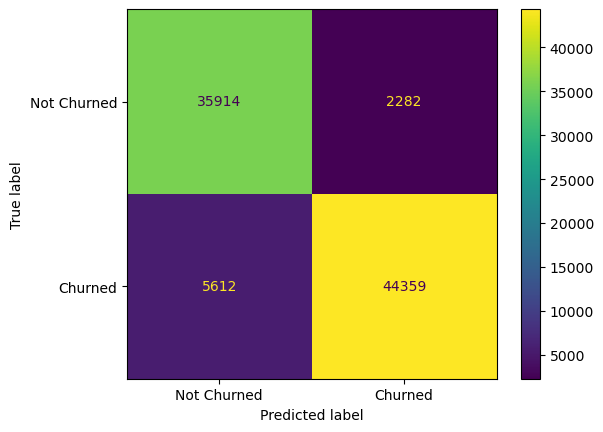

In [31]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred,labels=nb.classes_)
cm
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [32]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
Model2= GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
Model2.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=2)

In [33]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_NB = Model2.predict(X_test)
# Print values
print("Best parameters found: ", Model2.best_params_)
print("Accuracy: ", accuracy_score(Y_test,g_pred_NB))
print("Classification Report:\n", classification_report(Y_test, g_pred_NB))

Best parameters found:  {'var_smoothing': 1e-07}
Accuracy:  0.9105107353091293
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     38196
           1       0.95      0.89      0.92     49971

    accuracy                           0.91     88167
   macro avg       0.91      0.91      0.91     88167
weighted avg       0.91      0.91      0.91     88167



### 3.KNN Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
ky_pred=knn.predict(X_test)
ky_pred

array([1, 0, 1, ..., 0, 1, 0])

In [36]:
# Accuracy
from sklearn.metrics import accuracy_score
knn_accur_score=accuracy_score(Y_test,ky_pred)
print("Accuracy:",knn_accur_score)

Accuracy: 0.8923066453434959


In [37]:
# Classification report
from sklearn.metrics import classification_report
knn_report=classification_report(Y_test,ky_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     38196
           1       0.97      0.83      0.90     49971

    accuracy                           0.89     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.89      0.89     88167



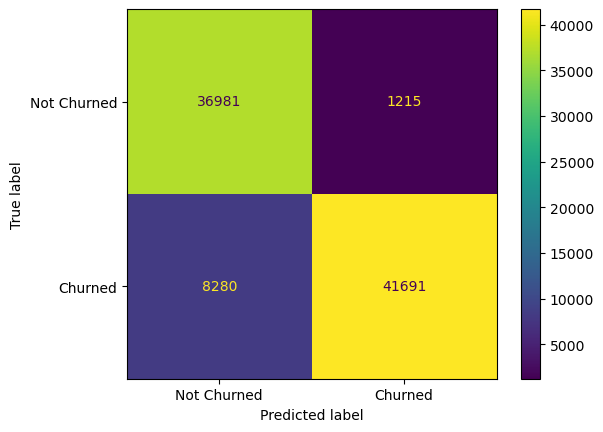

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,ky_pred,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
cm_dis.plot()

In [39]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

Model3= GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model3.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [40]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_knn = Model3.predict(X_test)
# Print values
print("Best parameters found: ", Model3.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_knn))
print("Classification Report:\n", classification_report(Y_test, g_pred_knn))

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy:  0.9014824140551454
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     38196
           1       0.99      0.83      0.91     49971

    accuracy                           0.90     88167
   macro avg       0.91      0.91      0.90     88167
weighted avg       0.92      0.90      0.90     88167



### 4. Decision Tree

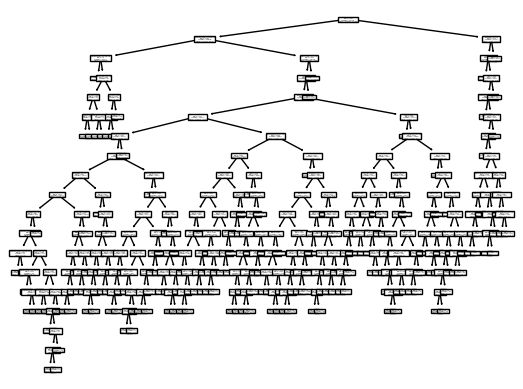

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x=["Age", "Gender","Tenure","Usage","Frequency","Support Calls","Payment Delay","Subscription Type","Contract Length","Total Spend","Last Interaction"]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)
tree.plot_tree(dtree,feature_names=x)
plt.show()

In [42]:
d_y_pred=dtree.predict(X_test)
d_y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [43]:
# Accuracy
from sklearn.metrics import accuracy_score
dt_accur_score=accuracy_score(Y_test,d_y_pred)
print("Accuracy:",dt_accur_score)

Accuracy: 0.9998865788787188


In [44]:
# feature importance
dtree.feature_importances_
pd.DataFrame({"variable":X_train.columns,"imp":dtree.feature_importances_*100}).sort_values("imp",ascending=False)

,variable,imp
4,Support Calls,35.895887
8,Total Spend,24.232936
0,Age,14.480213
5,Payment Delay,13.078012
7,Contract Length,5.912838
9,Last Interaction,4.747038
2,Tenure,0.766279
1,Gender,0.628781
6,Subscription Type,0.194944
3,Usage Frequency,0.063072


In [45]:
sum(dtree.feature_importances_)

1.0

In [46]:
# Classification report
from sklearn.metrics import classification_report
dt_report=classification_report(Y_test,d_y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



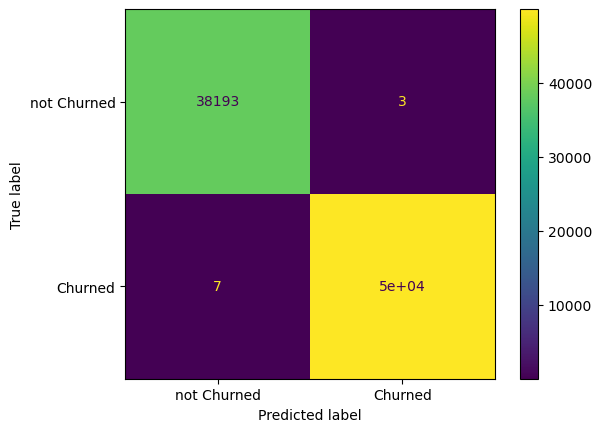

In [47]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,d_y_pred,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

In [48]:
# Model fitting with gridsearch CV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 15, 25, 35, 45],  # Maximum depth of the tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
Model4= GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the model
Model4.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 25, 35, 45]},
             verbose=2)

In [97]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
g_pred_dtree = Model4.predict(X_test)
# Print values
print("Best parameters found: ", Model4.best_params_)
print("Accuracy: ", accuracy_score(Y_test, g_pred_dtree))
print("Classification Report:\n", classification_report(Y_test, g_pred_dtree))

Best parameters found:  {'criterion': 'entropy', 'max_depth': 35}
Accuracy:  0.9998638946544626
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



### 5. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [51]:
pred_RF=RF.predict(X_test)
pred_RF

array([1, 0, 1, ..., 0, 1, 0])

In [52]:
# Accuracy
from sklearn.metrics import accuracy_score
dt_accur_score=accuracy_score(Y_test,pred_RF)
print("Accuracy:",dt_accur_score)

Accuracy: 0.999342157496569


In [53]:
# Classification report
from sklearn.metrics import classification_report
RF_report=classification_report(Y_test,pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



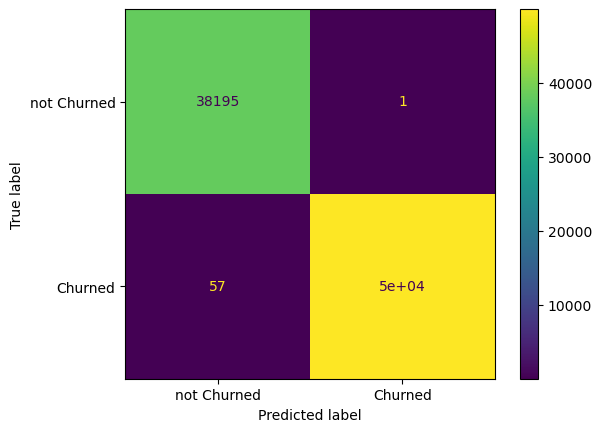

In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_RF,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 6. Gradient Boosting classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [56]:
pred_GB=gbc.predict(X_test)
pred_GB

array([1, 0, 1, ..., 0, 1, 0])

In [57]:
from sklearn.metrics import accuracy_score
gbc_accur_score=accuracy_score(Y_test,pred_GB)
print("Accuracy:",gbc_accur_score)

Accuracy: 0.9965860242494358


In [58]:
# Classification report
from sklearn.metrics import classification_report
GB_report=classification_report(Y_test,pred_GB)
print(GB_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38196
           1       1.00      0.99      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



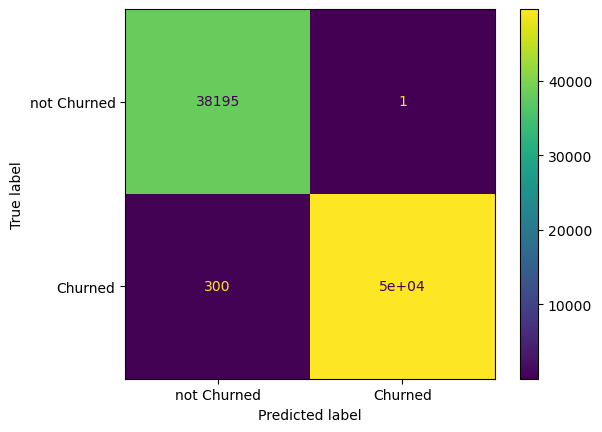

In [59]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_GB,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 7. Bagging meta-estimator
In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train,Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [61]:
pred_BE=bagging.predict(X_test)
pred_BE

array([1, 0, 1, ..., 0, 1, 0])

In [62]:
# Accuracy
from sklearn.metrics import accuracy_score
bag_accur_score=accuracy_score(Y_test,pred_BE)
print("Accuracy:",bag_accur_score)

Accuracy: 0.9497657853845544


In [63]:
# Classification report
from sklearn.metrics import classification_report
BE_report=classification_report(Y_test,pred_BE)
print(BE_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     38196
           1       1.00      0.92      0.95     49971

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.95      0.95      0.95     88167



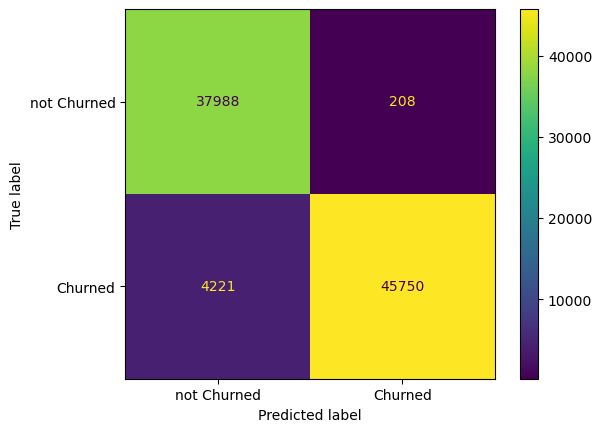

In [64]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_BE,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 8. MLP Classifier

In [65]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(64,32),max_iter=10, random_state=42)
mlp=mlp.fit(X_train,Y_train)

C:\Users\Nisha\Downloads\New folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
pred_MLP=mlp.predict(X_test)
pred_MLP

array([1, 0, 1, ..., 0, 1, 0])

In [67]:
# Accuracy
from sklearn.metrics import accuracy_score
mlp_accur_score=accuracy_score(Y_test,pred_MLP)
print("Accuracy:",mlp_accur_score)

Accuracy: 0.9424160967255323


In [68]:
# Classification report
from sklearn.metrics import classification_report
MLP_report=classification_report(Y_test,pred_MLP)
print(MLP_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     38196
           1       0.97      0.93      0.95     49971

    accuracy                           0.94     88167
   macro avg       0.94      0.94      0.94     88167
weighted avg       0.94      0.94      0.94     88167



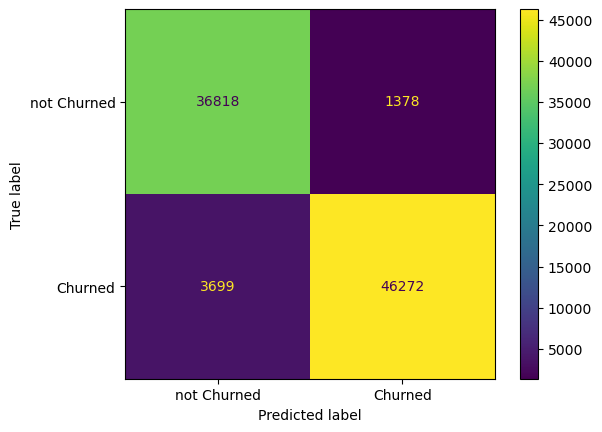

In [69]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_MLP,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 9. XGbooster

In [70]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(X_train,Y_train)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
pred_xgb=xgb.predict(X_test)
pred_xgb

array([1, 0, 1, ..., 0, 1, 0])

In [72]:
# Accuracy
from sklearn.metrics import accuracy_score
xgb_accur_score=accuracy_score(Y_test,pred_xgb)
print("Accuracy:",xgb_accur_score)

Accuracy: 0.9998412104302064


In [73]:
# Classification report
from sklearn.metrics import classification_report
xgb_report=classification_report(Y_test,pred_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



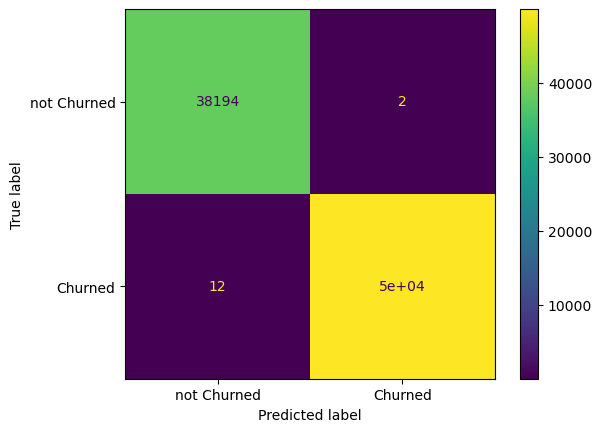

In [74]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_xgb,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

### 10. Stacking Classifier

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [76]:
# define base classsifier
base_classifiers=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier()),
    ('rf',RandomForestClassifier()),
]

# define meta classifier
meta_classifier=LogisticRegression()

In [77]:
# Create Stacking classifier
stack=StackingClassifier(estimators=base_classifiers,final_estimator=meta_classifier,cv=5)

# Train the stacking classifier
stack=stack.fit(X_train,Y_train)

C:\Users\Nisha\Downloads\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nisha\Downloads\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [78]:
pred_stack=stack.predict(X_test)
pred_stack

array([1, 0, 1, ..., 0, 1, 0])

In [79]:
# Accuracy
from sklearn.metrics import accuracy_score
stack_accur_score=accuracy_score(Y_test,pred_stack)
print("Accuracy:",stack_accur_score)

Accuracy: 0.9999319473272312


In [80]:
# Classification report
from sklearn.metrics import classification_report
stack_report=classification_report(Y_test,pred_stack)
print(stack_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38196
           1       1.00      1.00      1.00     49971

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



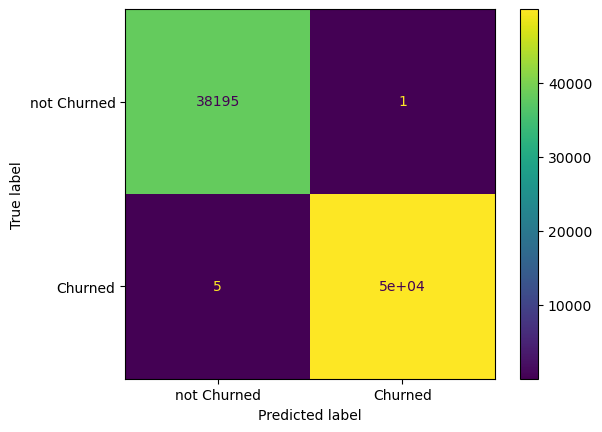

In [81]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred_stack,labels=nb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not Churned","Churned"])
cm_dis.plot()

In [82]:
# Model Accuracy Comparison
Algorithem_model=pd.DataFrame({'Models':['LR','nb','knn','dtree','RF','gbc','bagging','mlp','xgb','stack'],
                        'Accuracy':[accuracy_score(Y_test,pred_LR),
                                    accuracy_score(Y_test,y_pred),
                                    accuracy_score(Y_test,ky_pred),
                                    accuracy_score(Y_test,d_y_pred),
                                    accuracy_score(Y_test,pred_RF),
                                    accuracy_score(Y_test,pred_GB),
                                    accuracy_score(Y_test,pred_BE),
                                    accuracy_score(Y_test,pred_MLP),
                                    accuracy_score(Y_test,pred_xgb),
                                    accuracy_score(Y_test,pred_stack)],
                         'Precision':[precision_score(Y_test,pred_LR),
                                    precision_score(Y_test,y_pred),
                                    precision_score(Y_test,ky_pred),
                                    precision_score(Y_test,d_y_pred),
                                    precision_score(Y_test,pred_RF),
                                    precision_score(Y_test,pred_GB),
                                    precision_score(Y_test,pred_BE),
                                    precision_score(Y_test,pred_MLP),
                                    precision_score(Y_test,pred_xgb),
                                    precision_score(Y_test,pred_stack)],
                         'Recall':[recall_score(Y_test,pred_LR),
                                    recall_score(Y_test,y_pred),
                                    recall_score(Y_test,ky_pred),
                                    recall_score(Y_test,d_y_pred),
                                    recall_score(Y_test,pred_RF),
                                    recall_score(Y_test,pred_GB),
                                    recall_score(Y_test,pred_BE),
                                    recall_score(Y_test,pred_MLP),
                                    recall_score(Y_test,pred_xgb),
                                    recall_score(Y_test,pred_xgb)]
                                })
Algorithem_model

,Models,Accuracy,Precision,Recall
0,LR,0.851373,0.880913,0.853095
1,nb,0.910465,0.951073,0.887695
2,knn,0.892307,0.971682,0.834304
3,dtree,0.999887,0.999940,0.999860
4,RF,0.999342,0.999980,0.998859
5,gbc,0.996586,0.999980,0.993997
6,bagging,0.949766,0.995474,0.915531
7,mlp,0.942416,0.971081,0.925977
8,xgb,0.999841,0.999960,0.999760
9,stack,0.999932,0.999980,0.999760


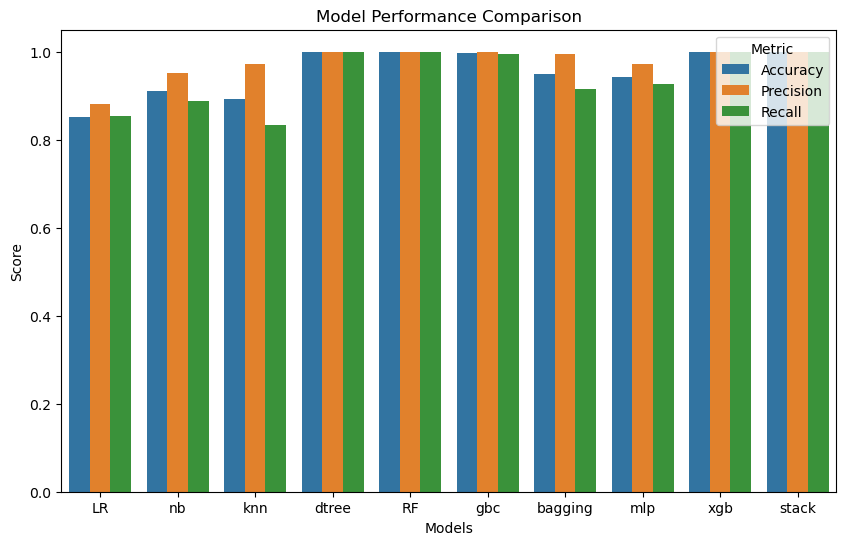

In [104]:
# Melt the DataFrame to long format for bar plot
Algorithem_model_melted = Algorithem_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Algorithem_model_melted, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ### Interpretation:   
                From the above graph, we may observed that the algorithms Decision tree ,Randon forest ,XGBooster and Stacking classifier have a higher accuracy,precision and recall among all algorithms.Therefore they are the best models.

## gridsearchcv comparision graph

In [98]:
# Model Accuracy Comparison
Grid_model=pd.DataFrame({'Models':['LR','nb','knn','dtree'],
                        'Accuracy':[accuracy_score(Y_test, g_pred_LR),
                                    accuracy_score(Y_test,g_pred_NB),
                                    accuracy_score(Y_test,g_pred_knn),
                                    accuracy_score(Y_test,g_pred_dtree)],
                         'Precision':[precision_score(Y_test,g_pred_LR),
                                    precision_score(Y_test,g_pred_NB),
                                    precision_score(Y_test,g_pred_knn),
                                    precision_score(Y_test,g_pred_dtree)],
                         'Recall':[recall_score(Y_test,g_pred_LR),
                                    recall_score(Y_test,g_pred_NB),
                                    recall_score(Y_test,g_pred_knn),
                                    recall_score(Y_test,g_pred_dtree)]
                                })
Grid_model

,Models,Accuracy,Precision,Recall
0,LR,0.851498,0.881129,0.853075
1,nb,0.910511,0.951309,0.887535
2,knn,0.999864,0.999940,0.999820
3,dtree,0.999864,0.999940,0.999820


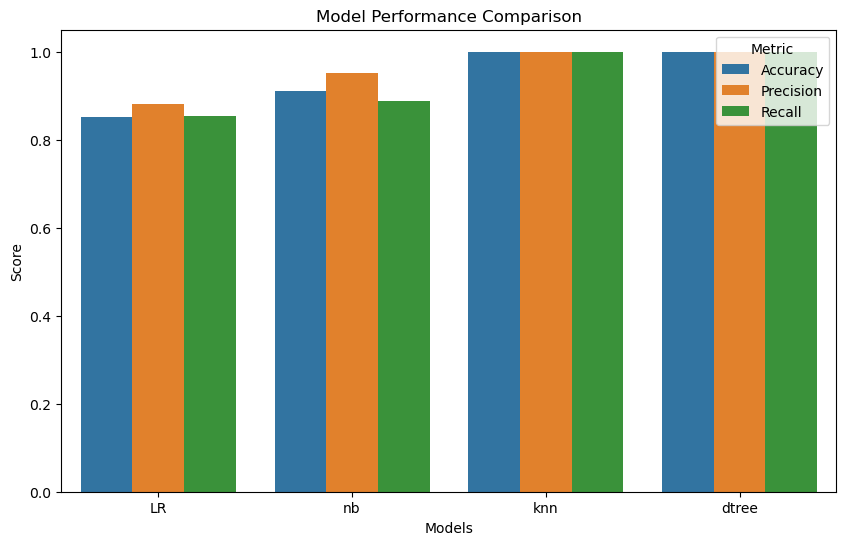

In [102]:
# Melt the DataFrame to long format for bar plot
Grid_model_melted = Grid_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Grid_model_melted, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ### Interpretation:   
                From the above graph of Gridsearchcv, we may observed that the algorithms K-Nearest Neighbors and Decision tree classifier have a higher accuracy,precision and recall among all algorithms.Therefore they are the best models.

## comparision of accuracy of Algorithem and Gridsearchcv

In [106]:
Comparision_model=pd.DataFrame({'Models':['LR','nb','knn','dtree'],
                        'Accuracy_O':[accuracy_score(Y_test,pred_LR),
                                    accuracy_score(Y_test,y_pred),
                                    accuracy_score(Y_test,ky_pred),
                                    accuracy_score(Y_test,d_y_pred),],
                        'Accuracy_G':[accuracy_score(Y_test, g_pred_LR),
                                    accuracy_score(Y_test,g_pred_NB),
                                    accuracy_score(Y_test,g_pred_knn),
                                    accuracy_score(Y_test,g_pred_dtree)]
                               })
Comparision_model

,Models,Accuracy_O,Accuracy_G
0,LR,0.851373,0.851498
1,nb,0.910465,0.910511
2,knn,0.892307,0.999864
3,dtree,0.999887,0.999864


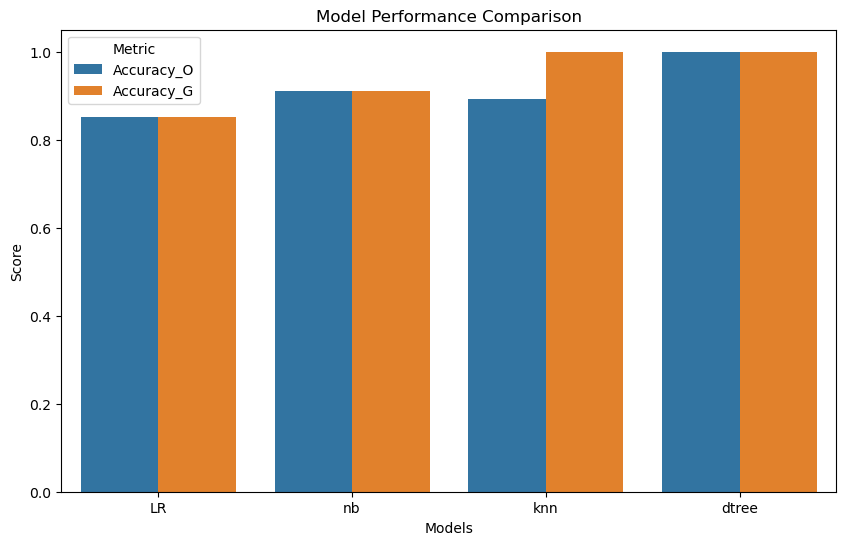

In [108]:
# Melt the DataFrame to long format for bar plot
Comparision = Comparision_model.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Comparision, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :
                    From the above graph we can say that the accuracy achieved after applying GridSearchCv is superiour to that of the previous model.       

### Comparision of Precision of Algorithm and GridSearchCV

In [112]:
Comparision_model1=pd.DataFrame({'Models':['LR','nb','knn','dtree'],
                        'Precision_O':[precision_score(Y_test,pred_LR),
                                    precision_score(Y_test,y_pred),
                                    precision_score(Y_test,ky_pred),
                                    precision_score(Y_test,d_y_pred),],
                        'precision_G':[precision_score(Y_test, g_pred_LR),
                                    precision_score(Y_test,g_pred_NB),
                                    precision_score(Y_test,g_pred_knn),
                                    precision_score(Y_test,g_pred_dtree)]
                               })
Comparision_model

,Models,Accuracy_O,Accuracy_G
0,LR,0.851373,0.851498
1,nb,0.910465,0.910511
2,knn,0.892307,0.999864
3,dtree,0.999887,0.999864


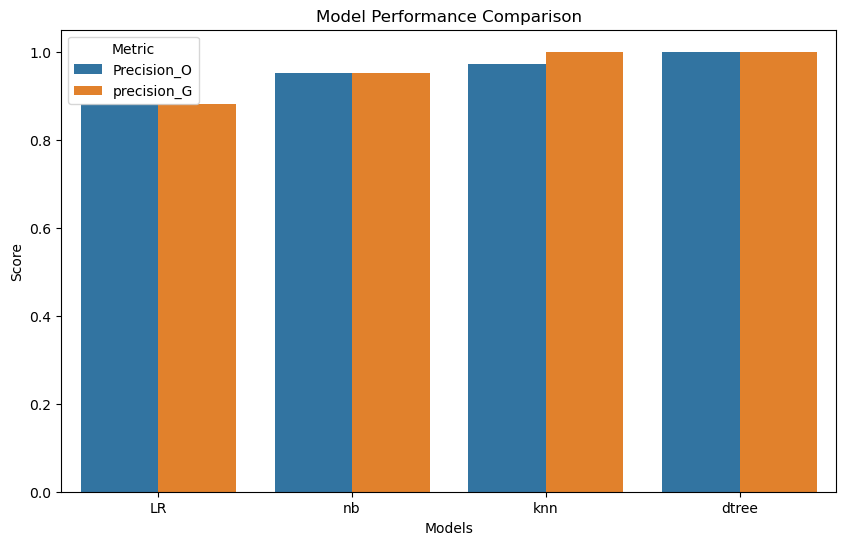

In [110]:
# Melt the DataFrame to long format for bar plot
Comparision = Comparision_model1.melt(id_vars='Models', var_name='Metric', value_name='Score')
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Comparision, x='Models', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

* ## Interpretation :
                  From the above graph we can say that the precision achieved after applying GridSearchCv is superiour to that of the previous model.